In [211]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm


#Constantes
e0 = 8.8541878128 * 10**-12
u0 = 12.566370614 * 10**-7

#variable inavariable
Q = 1.602 * 10**-19

#Vecteur position
pos = np.array([[2.], [3.], [4.]])
posArray = np.array([[x,y,z] for x in np.arange(-3,3,0.5) for y in np.arange(-3,3,0.5) for z in range(1,3)])

#Variables dans S
V = 0.6
t = 10.

x, y, z = pos

#fonctions


module = lambda x,y,z : math.sqrt(x**2 + y**2 + z**2)

gamma = lambda V : 1 / math.sqrt(1.0 - V**2)


def transform_x(x):
    return gamma(V) * (x - (V*t))

def transform_t(t):
    return gamma(V) * (t - (V * x))

#Variables dans S'
xp = transform_x(x)
yp = y
zp = z
tp = transform_t(t)


#Champ électrique dans S:

def champ_elec(x, y, z):
    '''
    Évalue le champ électrique à la position (x,y,z) de la charge ponctuelle dans le référentiel inertiel mobile (non-prime).
    '''
    return Q / (4 * math.pi * e0 * module(x, y, z)**3) * np.array([[x], [y], [z]])
    
#Champ électrique dans S':
def champ_elecprime(x, y, z):
    '''
    Évalue le champ électrique à la position (x,y,z) de la charge ponctuelle dans le référentiel inertiel fixe (prime)
    '''
    return champ_elec(x,y,z) * np.array([[1], [gamma(V)], [gamma(V)]])


#Champ magnétique dans S:
def get_champ_mag(x, y, z):
    '''
    Évalue le champ magnétique à la position (x,y,z) de la charge ponctuelle dans le référentiel inertiel fixe (prime)
    '''
    return u0 * Q * gamma(V) * V / (4 * math.pi * module(x,y,z)**3) * np.array([[0], [z], [-y]])





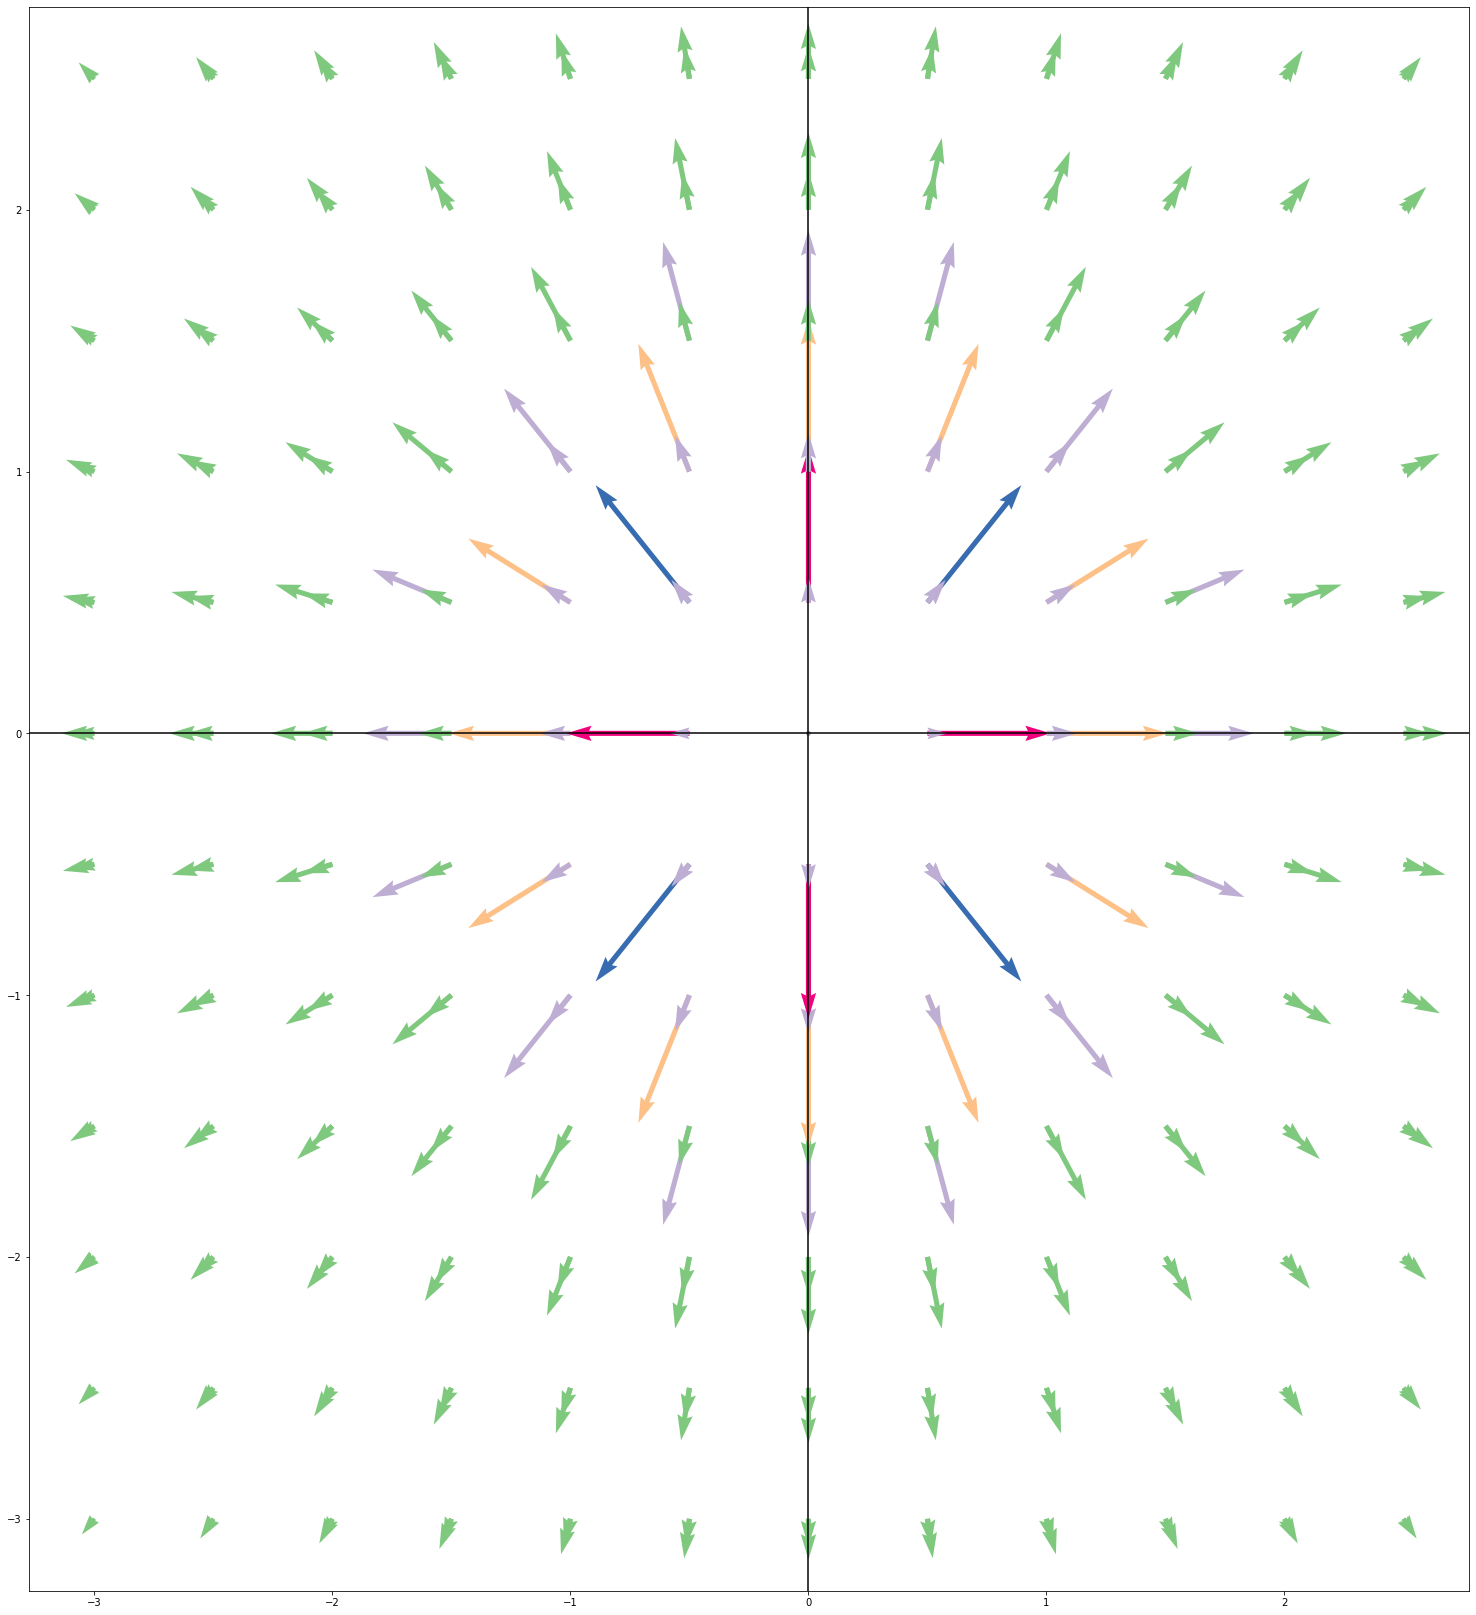

In [210]:
def graph():
    fig = plt.figure(figsize=(20,22))
    axes = fig.add_axes([0,0,1,1])
    
    
    elecprimeList = np.array([champ_elecprime(vec[0],vec[1],vec[2]) for vec in posArray])
    x_list = elecprimeList[:,0]
    y_list = elecprimeList[:,1]
    colors = elecprimeList[:,2]
    plt.set_cmap("Accent")
    axes.axhline(y=0, color='k')
    axes.axvline(x=0, color='k')
    axes.quiver(posArray[:,0],posArray[:,1],x_list,y_list, colors, units = "xy")

graph()